## Import module

In [1]:
import sys
import os
sys.path.insert(0, "../") # uncomment to work with local copy
import diffusive_solver as df
print(df.__version__)

from diffusive_solver import *

3.0rc8


## Create mesh in gmsh

In [2]:
mesh_folder = 'geometry_files'
geometry_file = '/device.geo'
#os.system('gmsh -2 {}'.format(mesh_folder + geometry_file)) #creates .msh file
mesh_file = '{}'.format('.'.join((mesh_folder + geometry_file).split(sep = '.')[:-1]) + '.msh')

## Convert mesh and load in dolfin

In [3]:
geometry = Geometry.from_msh_file(filename = mesh_file, n_contacts = 2)

In [4]:
p1 = dol.plot(geometry.subdomain_marker)
plt.colorbar(mappable = p1)

In [5]:
output_folder = 'testing_results/external_mesh'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

## Check contact markers

Total volume = 5.75000000000001
Total area = 12.886349517372672
Subdomain 1 with volume = 0.0
Subdomain 2 with volume = 0.0
Contact 1 with area = 2.0
Contact 2 with area = 2.2360679774997894


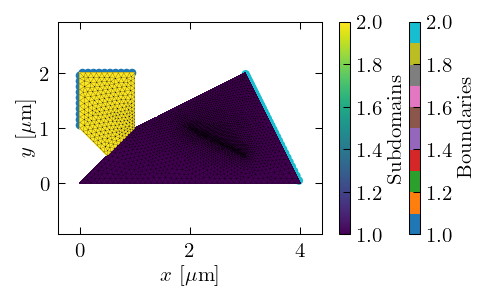

In [6]:
plt.figure()
plt.axis('equal')
plt.xlabel(r'$x~[{\rm \mu m}]$')
plt.ylabel(r'$y~[{\rm \mu m}]$')
p1,_ = geometry.plot(cmap = 'tab10')
p2,_ = geometry.plot_subdomains(show_mesh =False) 
cb  = plt.colorbar(mappable=p1)
cb.set_label(r'Boundaries')
cb2  = plt.colorbar(mappable=p2)
cb2.set_label(r'Subdomains')
plt.tight_layout()
plt.savefig(output_folder + '/boundaries.pdf')

geometry.check_dimensions()

## Define coefficients

In [7]:
cc = Matrix_Expression(1., dimension = 1)
tt  = Matrix_Expression([[2.,0],[0,2]], dimension = 2, scalar = False)
ct = Matrix_Expression({1: [[-1.,0],[0,-1]], 2: [[1.,0],[0,1]]}, 
                       dimension = 2, marker = geometry.subdomain_marker, scalar = False)
L = [[cc,ct],
     [ct,tt]]
Gamma = [[Matrix_Expression(0, dimension = 1),Matrix_Expression(0, dimension = 1)],
         [Matrix_Expression(0, dimension = 1),Matrix_Expression(5, dimension = 1)]]

#! cc * tt -ct**2 > 0 for L to be positive defined 

## Solve FEM

In [8]:
problem = Problem(geometry = geometry, n_fields =2, #self_adjoint = True,
                  L = L, Gamma = Gamma, biases = [[0.,1.],[0.,0.]])

In [9]:
problem.solve()

## Calculate derived quantities

In [10]:
problem.compute_fluxes()

## Plot results

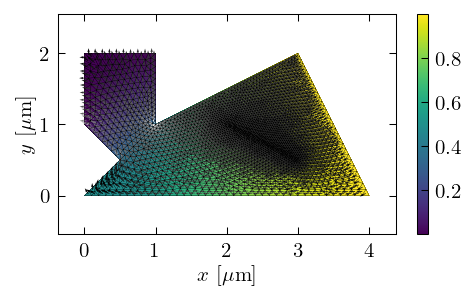

In [11]:
for i in range(problem.n_fields):
    plt.figure()
    plt.axis('equal')
    plt.xlabel(r'$x~[{\rm \mu m}]$')
    plt.ylabel(r'$y~[{\rm \mu m}]$')
    
    problem.plot_field(i)
    plt.colorbar()
    problem.plot_current(i)
    
    plt.tight_layout()
    plt.savefig(output_folder +'/device{}.pdf'.format(i))

In [12]:
plt.figure()
plt.axis('equal')
plt.xlabel(r'$x~[{\rm \mu m}]$')
plt.ylabel(r'$y~[{\rm \mu m}]$')    

problem.plot_responsivity(flux = 0,contact = 2, source = 1, show_mesh = False,cmap = 'hot')


(<matplotlib.collections.PolyCollection at 0x7fce24ecf6d0>, None)

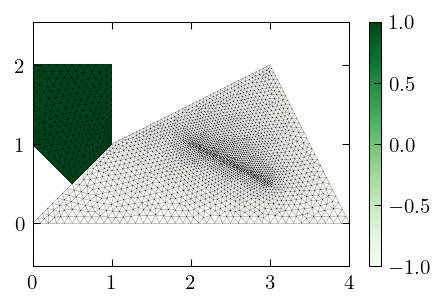

In [13]:
ct.plot(i=1,j=1, cmap = 'Greens')
plt.colorbar()